# Import importance lib

In [217]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Create sequential model

In [218]:
model = keras.Sequential()
model.add(keras.Input(shape=(9,)))

model.add(layers.Dense(256,activation="relu", name="H_layer1"))
model.add(layers.Dense(128,activation="relu", name="H_Layer2"))
model.add(layers.Dense(64,activation="relu", name="H_Layer3"))

model.add(layers.Dense(2,activation="linear", name="Output_layer"))

In [219]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ H_layer1 (Dense)                │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ H_Layer2 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ H_Layer3 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,842 (171.26 KB)

 Trainable params: 43,842 (171.26 KB)

 Non-trainable params: 0 (0.00 B)

In [220]:
model.compile(optimizer="sgd",loss='mse')

# Load train data

<ul>
<li>X_train : [[IR0, IR1, IR2, IR3, IR4, IR5, IR6 ,IR7,Smell],,,,]</li>
<li>Y_train : [[Turn ,Move],,,,]</li>
</ul>

In [221]:
# #moc data
# X_train = [[1,2,3,4,5,6,7,8,9],[4,3,7,5,4,8,4,3,2]]
# Y_train = [[3,2],[1,6]]
# X_train = np.array(X_train)
# Y_train = np.array(Y_train)

In [222]:
# df = pd.DataFrame(columns=['IR0','IR1','IR2','IR3','IR4','IR5','IR6','IR7','Smell','Turn','Move'])
# df.to_csv('./csv/irp_ann.csv')

In [223]:
# df2 = pd.read_csv('./csv/history_all.csv')

In [224]:
# df2.head(5)

In [225]:
df = pd.read_csv("./csv/irp_ann.csv")

In [226]:
df = df.drop_duplicates()

In [227]:
df = df.drop(columns=['Unnamed: 0'])

In [228]:
for i in range(0,8):
    df[f"IR{i}"] = df[f"IR{i}"]/100

In [229]:
df['Smell'] = df['Smell']/360
df['Turn'] = df['Turn']/360
df['Move'] = df['Move']/100

In [230]:
# df.head(4)

In [231]:
# df.info()

In [232]:
X = df.drop(columns=['Turn','Move'])

In [243]:
X.shape

(15000, 9)

In [233]:
y = df[['Turn','Move']]

In [234]:
# X = df2.drop(columns=['turn','move'])
# X = X/100

In [235]:
# y = df2[['turn','move']]
# y = y/100

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Train model

In [237]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=256,epochs=1000)

Epoch 1/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0237 - val_loss: 0.0081
Epoch 2/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0070 - val_loss: 0.0073
Epoch 3/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 - val_loss: 0.0068
Epoch 4/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 - val_loss: 0.0065
Epoch 5/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0058 - val_loss: 0.0062
Epoch 6/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056 - val_loss: 0.0060
Epoch 7/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 - val_loss: 0.0058
Epoch 8/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - val_loss: 0.0057
Epoch 9/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 10/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050 - val_loss: 0.0054
Epoch 11/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - val_loss: 0.0054
Epoch 12/1000
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

# Model evaluate

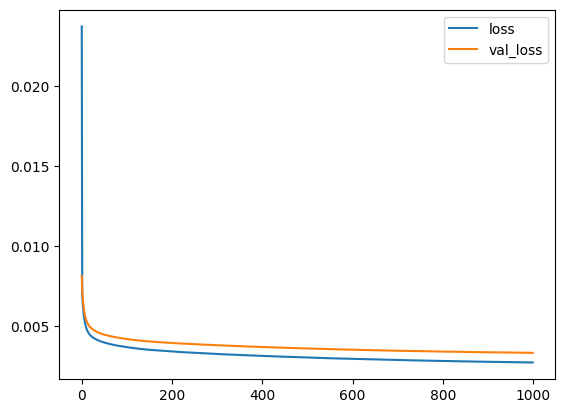

In [238]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

# Model predict

In [239]:
model.predict(np.array([[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.07541315, 0.06224347]], dtype=float32)

# Save model

In [240]:
model.save('./model/irp_ANN.keras')

# Load model and predict

In [241]:
load = keras.models.load_model('./model/irp_ANN.keras')

In [242]:
load.predict(np.array([[1,2,3,4,5,6,7,8,9]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[ 1.0342791 , -0.22872247]], dtype=float32)